## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False

## Get the data

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Check shape

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

## Check an image

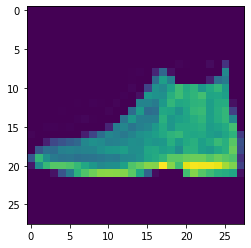

In [65]:
plt.imshow(x_test[0])

## Scale x_train and x_test

In [9]:
x_train = x_train/255
x_test = x_test /255

## Reshape x_train and x_test

In [14]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

## One hot encode y_train and y_test labels

In [16]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

## Create model

**Import model, layers and early stopping callback**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Create model**

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=1)

model = Sequential()

# Convolution layers
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D())

# Flatten
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Dropout layer to avoid overfitting
model.add(Dropout(0.5))

# output layer
model.add(Dense(10, activation='softmax'))

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [23]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6211 - accuracy: 0.7743 - val_loss: 0.4118 - val_accuracy: 0.8482
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4104 - accuracy: 0.8529 - val_loss: 0.3622 - val_accuracy: 0.8670
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3577 - accuracy: 0.8713 - val_loss: 0.3378 - val_accuracy: 0.8754
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3290 - accuracy: 0.8802 - val_loss: 0.3229 - val_accuracy: 0.8809
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3086 - accuracy: 0.8875 - val_loss: 0.3116 - val_accuracy: 0.8839
Epoch 6/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2932 - accuracy: 0.8931 - val_loss: 0.3145 - val_accuracy: 0.8863


## Evaluate model

In [24]:
loss = pd.DataFrame(model.history.history)

**plot loss and validation loss**

<AxesSubplot:>

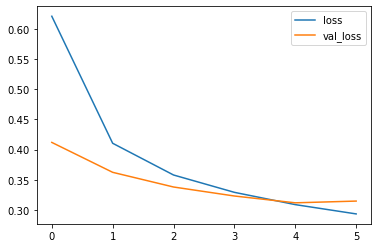

In [25]:
loss[['loss','val_loss']].plot()

**Plot accuracy and validation accuracy**

<AxesSubplot:>

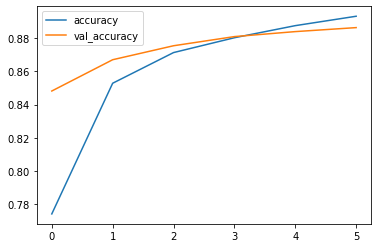

In [26]:
loss[['accuracy','val_accuracy']].plot()

In [28]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3145 - accuracy: 0.8863


[0.31448614597320557, 0.8863000273704529]

In [29]:
model.metrics_names

['loss', 'accuracy']

## Confusion matrix and Classification report

**Getting predictions**

In [31]:
predictions = model.predict(x_test)
predict_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 13ms/step


In [35]:
predict_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

**importing cofusion matrix and classification report**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

**Creating confusion matrix**

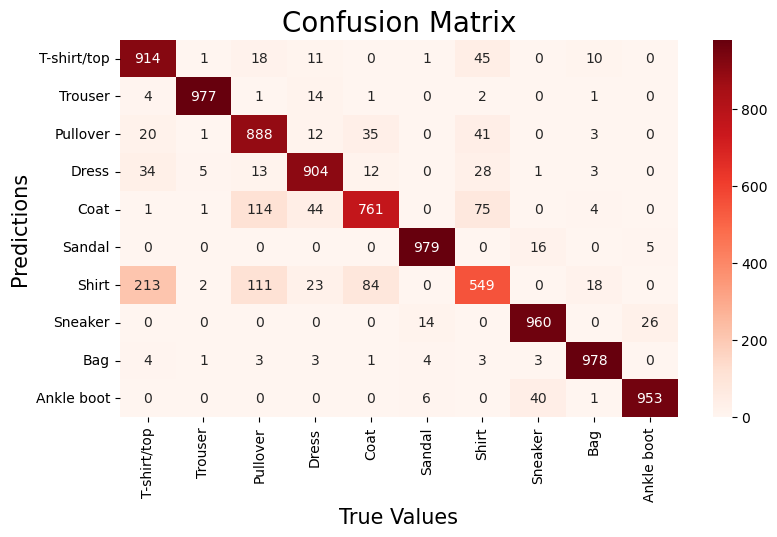

In [53]:
confusion_mat = confusion_matrix(y_test, predict_classes)
plt.figure(figsize=(9,5), dpi=100)
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xticks(rotation='vertical')
plt.xlabel('True Values', fontdict={'fontsize':15})
plt.ylabel('Predictions', fontdict={'fontsize':15})
plt.title('Confusion Matrix', fontdict={'fontsize':20})
plt.show()

**Classification report**

In [54]:
print(classification_report(y_test, predict_classes))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.89      0.83      1000
           3       0.89      0.90      0.90      1000
           4       0.85      0.76      0.80      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.55      0.63      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



## Predicting a picture

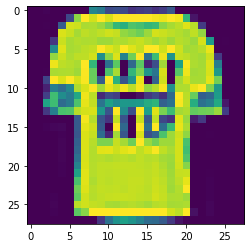

In [60]:
from random import randint
r = randint(0,1000)
random_image = x_test[r]
plt.imshow(random_image)

In [62]:
np.argmax(model.predict(random_image.reshape(1,28,28,1)))

1/1 [==============================] - 0s 69ms/step


0

**Recall from labels that 0 class corresponds to T-shirt/top**

## Save the model for future use

In [ ]:
model.save('MNIST fashion classifier.hf')

## The End